## Observations and Insights 

Observing the relationship between average tumor volume and mouse weight, relative to the Capomulin regimen treatment, we can see that these factors are strongly correlated (ie. the relationship is both strong and positive). We can posit this strong correlation as the data points hover closely to the line of best fit (see Linear Regression Model below). Additionally, the R-value (correlation coefficient) is 0.84: generally, a R-value above 0.7 is considered a strong correlation.

Capomulin and Ramicane appear to be the most effective treatments in reducing tumor volume amongst the mice observed, according to the data provided. The results witnessed, following this study, indicate that mice treated under these drug regimens experienced significantly lower mean and median values corresponding to tumor volumes relative to the other drug regimens. Confidence in this conclusion is reinforced by the fact that these drug regimens also experienced the highest total measurements taken relative to other drug regimens. (See bar chart below).

In addition, the effectiveness of Capomulin - as it relates to tumor volume reduction - is bolstered in the analysis of Mouse y793 (see Line Plot below). In this analysis, we can see a steep decline in tumor volume over time. While an analysis of single mouse is insufficient and inconclusive when viewed in isolation, this general trend seems transferable: as a random sampling of other mice undergoing the Capomulin regimen treatment produces similar results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_mouse_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_mouse_data[combined_mouse_data.duplicated(['Mouse ID'])]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Tumor Vol. Mean": mean, "Tumor Vol. Median": median, "Tumor Vol. Variance": variance, "Tumor Vol. Std Dev": standard_deviation, "Tumor Vol. SEM": SEM})
summary_df

,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std Dev,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

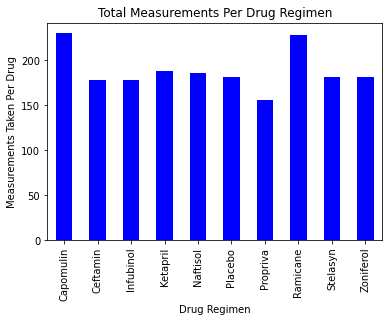

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_data = clean_df.groupby(["Drug Regimen"])
regimen_count = regimen_data["Mouse ID"].count()
regimen_count.plot(kind="bar", facecolor="blue")
plt.title("Total Measurements Per Drug Regimen")
plt.ylabel("Measurements Taken Per Drug")
plt.xlabel("Drug Regimen")
plt.show()

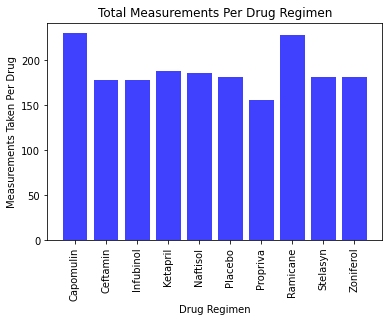

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
regimen = summary_df.index

plt.bar(regimen, count, color="blue", alpha=0.75, align="center")
plt.title("Total Measurements Per Drug Regimen")
plt.ylabel("Measurements Taken Per Drug")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Mice Gender Distribution'}, ylabel='Mouse ID'>

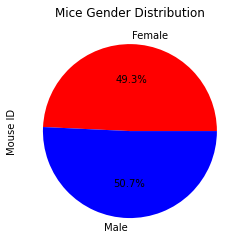

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_count = gender_df[["Sex", "Mouse ID"]].set_index("Sex")
gender_count
colors = ["red","blue"]
gender_count.plot(kind="pie", y="Mouse ID", title="Mice Gender Distribution", colors=colors, autopct='%1.1f%%', labels=gender_df["Sex"], legend = False,)
          

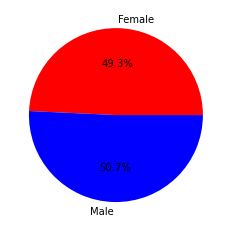

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_df.groupby(["Sex"])["Mouse ID"].count()

labels = ["Female", "Male"]
colors = ["red","blue"]

plt.pie(mice_gender, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_treaments = clean_df[clean_df["Drug Regimen"].isin(four_treatments_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID").last()["Timepoint"]
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatments_df = pd.merge(last_timepoint_df, clean_df, how = 'left', on = ("Mouse ID", "Timepoint")).sort_values(["Drug Regimen"])
treatments_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
66,g316,45,Capomulin,Female,22,22,40.159220,2
181,s710,45,Capomulin,Female,1,23,40.728578,1
184,t565,45,Capomulin,Female,20,17,34.455298,0
170,r944,45,Capomulin,Male,12,25,41.581521,2
164,r554,45,Capomulin,Female,8,17,32.377357,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

capomulin_data = treatments_df.loc[treatments_df["Drug Regimen"]=="Capomulin"]
ramicane_data = treatments_df.loc[treatments_df["Drug Regimen"]=="Ramicane"]
infubinol_data = treatments_df.loc[treatments_df["Drug Regimen"]=="Infubinol"]
ceftamin_data = treatments_df.loc[treatments_df["Drug Regimen"]=="Ceftamin"]  

The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The median of tumor volumes is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


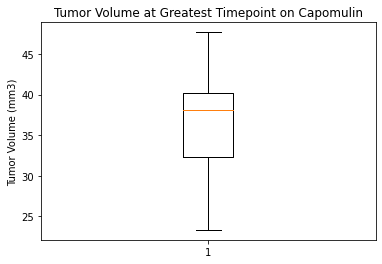

The lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The median of tumor volumes is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


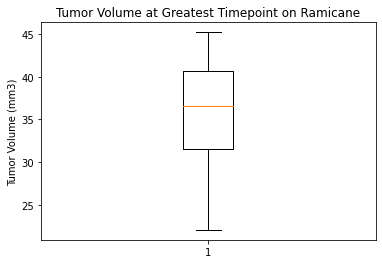

The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The median of tumor volumes is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


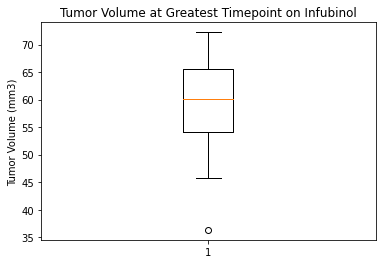

The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The median of tumor volumes is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


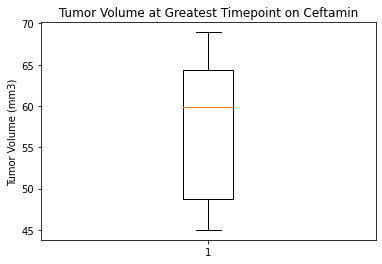

In [14]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in four_treatments_list:
    treatment_data = treatments_df.loc[treatments_df["Drug Regimen"]==treatment]
    tumor_vol = treatment_data["Tumor Volume (mm3)"]
    
    # Calculate IQR and Outliers
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor volumes is: {lowerq}")
    print(f"The upper quartile of tumor volumes is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")
    print(f"The median of tumor volumes is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Display box plot re: tumor volume corresponding to each of the four treatments
    fig1, ax1 = plt.subplots()
    ax1.set_title("Tumor Volume at Greatest Timepoint on "+treatment)
    ax1.set_ylabel("Tumor Volume (mm3)")
    ax1.boxplot(tumor_vol)
    plt.show()

In [15]:
treatments_df_4 = treatments_df.loc[(treatments_df["Drug Regimen"]=="Capomulin")|
                                    (treatments_df["Drug Regimen"]=="Ramicane")|
                                    (treatments_df["Drug Regimen"]=="Infubinol")|
                                    (treatments_df["Drug Regimen"]=="Ceftamin")]

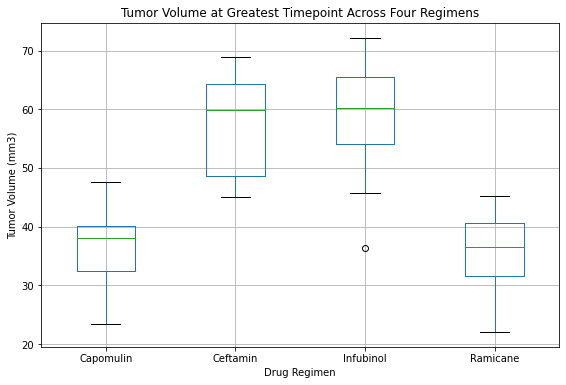

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments_df_4.boxplot(by="Drug Regimen", column = "Tumor Volume (mm3)", figsize=(9,6))
plt.title("Tumor Volume at Greatest Timepoint Across Four Regimens")
plt.suptitle("")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

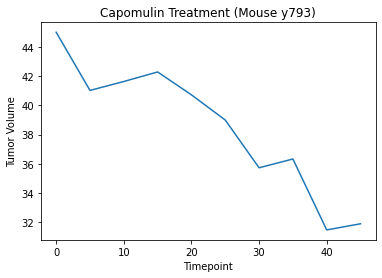

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = clean_df[clean_df["Mouse ID"] == "y793"]

plt.plot(Capomulin_mouse["Timepoint"],Capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment (Mouse y793)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot

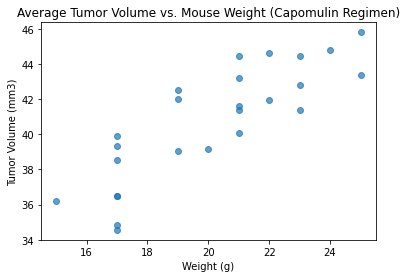

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_avgs = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Capomulin_avgs

Capomulin_tvol = Capomulin_avgs.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
Capomulin_tvol

Capomulin_weight = Capomulin_avgs.groupby(["Mouse ID"])["Weight (g)"].mean()
Capomulin_weight

x = Capomulin_weight
y = Capomulin_tvol

plt.scatter(x, y, marker='o', alpha=0.7)
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation Coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between tumor volume and weight among the mice observed is {round(correlation[0],2)}")

The correlation between tumor volume and weight among the mice observed is 0.84


The R-squared (i.e. Coefficient of determination) is: 0.7088568047708717
y = 0.95x + 21.55


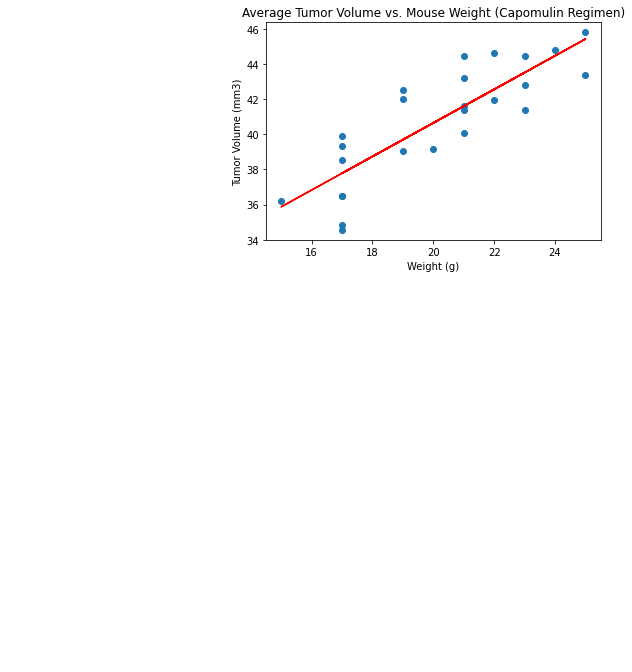

In [20]:
# Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The R-squared (i.e. Coefficient of determination) is: {rvalue**2}")
print(line_eq)
plt.show()